In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [14]:
df = pd.read_csv(r"T:\My Drive\000 ihsan\02 Courses\003GIT\MYProject\my ml project\multiple linear regression ml\FuelConsumptionCo2.csv")
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [15]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136


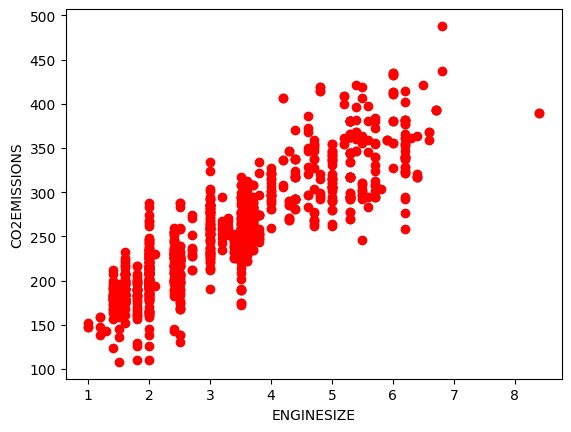

In [19]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color = 'red')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [22]:
msk = np.random.rand(len(df)) < 0.8 
train = cdf[msk]
test = cdf[~msk]

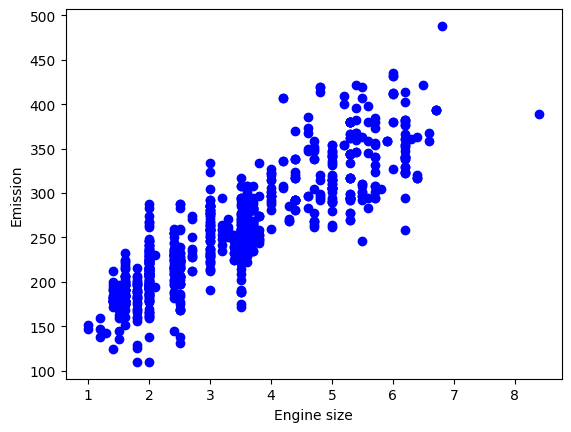

In [23]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# multiple_regression_model


In [31]:
from sklearn import linear_model
rgr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
rgr.fit (train_x,train_y)


LinearRegression()

In [32]:
print("Coefficients : " , rgr.coef_)

Coefficients :  [[10.69060767  7.56939059  9.45256838]]


# Prediction


In [36]:
y_ = rgr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
y_

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[250.15837374],
       [323.49821233],
       [323.49821233],
       [201.96905798],
       [213.31214003],
       [224.01741948],
       [247.64884042],
       [366.66846146],
       [252.37512461],
       [261.82769298],
       [285.76656816],
       [264.6634635 ],
       [368.61882151],
       [301.8359344 ],
       [378.07138989],
       [379.97773459],
       [204.80482849],
       [201.02380114],
       [201.96905798],
       [204.80482849],
       [240.08678572],
       [368.61882151],
       [313.67423217],
       [305.16692063],
       [204.80482849],
       [251.42986777],
       [201.02380114],
       [248.59409726],
       [212.36688319],
       [211.42162635],
       [215.2026537 ],
       [214.25739687],
       [253.11794818],
       [248.59409726],
       [249.5393541 ],
       [350.87720588],
       [270.13257126],
       [314.01218922],
       [307.39539136],
       [179.48532714],
       [217.5883831 ],
       [301.24741757],
       [340.31040215],
       [397

In [53]:
print("Mean Squared Error (MSE) : %.2f",  np.mean((y_ - test_y) **2 ))
print("variance score : %.2f : " , rgr.score(test_x,test_y))

Mean Squared Error (MSE) : %.2f 552.4699240119454
variance score : %.2f :  0.8720410798732461


__Explained variance regression score:__  
Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, the lower values are worse.
